# 05 Pandas Transform Data (on Load)

* Convert columns (apply custom function)
* Convert data types

Example: convert month name to integer on loading - https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

There are two main ways to control the values at read time, using dtypes or converters.

* dtype: force a data type on a column
* converters: execute arbitrary function on column

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("data/produkt_klima_tag_20161216_20180618_05792_modified.txt", sep=";")

In [3]:
df.head()

,Unnamed: 0,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,0,Station 57-92,20161216,10,13.8,6.3,3,0.0,0,8.450,65,1.0,0.6,714.30,-3.4,11.50,-0.9,-4.6,-999,eor
1,1,Station 57-92,20161217,10,5.0,2.0,3,0.0,0,7.933,65,5.7,0.7,718.97,-5.2,16.50,-2.5,-7.9,-999,eor
2,2,Station 57-92,20161218,10,10.5,4.2,3,3.8,7,3.450,65,7.3,2.2,714.58,-8.7,70.92,-5.5,-10.6,-999,eor
3,3,Station 57-92,20161219,10,30.8,14.4,3,0.0,0,6.867,75,4.3,1.8,708.39,-10.3,69.46,-4.2,-13.6,-999,eor
4,4,Station 57-92,20161220,10,19.7,8.1,3,0.0,0,7.283,75,2.0,2.8,711.40,-3.0,56.79,-1.5,-5.1,-999,eor


Two desired fixes:
    
* Convert STATIONS_ID to numeric value, e.g. "Station 57-92" to 5792 and
* parse date into a datetime.

Solution:

Use converters, which map a column name to a function.

In [4]:
df = pd.read_csv("data/produkt_klima_tag_20161216_20180618_05792_modified.txt", sep=";",
                converters={
                    "STATIONS_ID": lambda v: "".join([c for c in v if c.isdigit()]),
                    "MESS_DATUM": lambda v: pd.to_datetime(v, format="%Y%m%d"),
                })

Alternatively, the date column could have beed fixed with `pd.to_datetime(df["MESS_DATUM"], format="%Y%m%d")`.

Clean up column names, since they contain whitespace.

In [5]:
df.columns

Index(['Unnamed: 0', 'STATIONS_ID', 'MESS_DATUM', 'QN_3', '  FX', '  FM',
       'QN_4', ' RSK', 'RSKF', ' SDK', 'SHK_TAG', '  NM', ' VPM', '  PM',
       ' TMK', ' UPM', ' TXK', ' TNK', ' TGK', 'eor'],
      dtype='object')

A simple solution is to use the string methods, exposed on the `str` attribute.

In [6]:
df.columns.str.strip()

Index(['Unnamed: 0', 'STATIONS_ID', 'MESS_DATUM', 'QN_3', 'FX', 'FM', 'QN_4',
       'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM', 'TXK',
       'TNK', 'TGK', 'eor'],
      dtype='object')

We can replace the original index with the cleaned one.

In [7]:
df.columns = df.columns.str.strip()

In [9]:
df[["TMK", "TNK", "TXK", "MESS_DATUM"]]

,TMK,TNK,TXK,MESS_DATUM
0,-3.4,-4.6,-0.9,2016-12-16
1,-5.2,-7.9,-2.5,2016-12-17
2,-8.7,-10.6,-5.5,2016-12-18
3,-10.3,-13.6,-4.2,2016-12-19
4,-3.0,-5.1,-1.5,2016-12-20
...,...,...,...,...
545,-1.1,-4.9,2.1,2018-06-14
546,0.4,-5.2,4.2,2018-06-15
547,2.2,0.5,5.9,2018-06-16
548,1.7,-0.8,4.8,2018-06-17


<Axes: title={'center': 'Zugspitze Temperatures'}, xlabel='MESS_DATUM'>

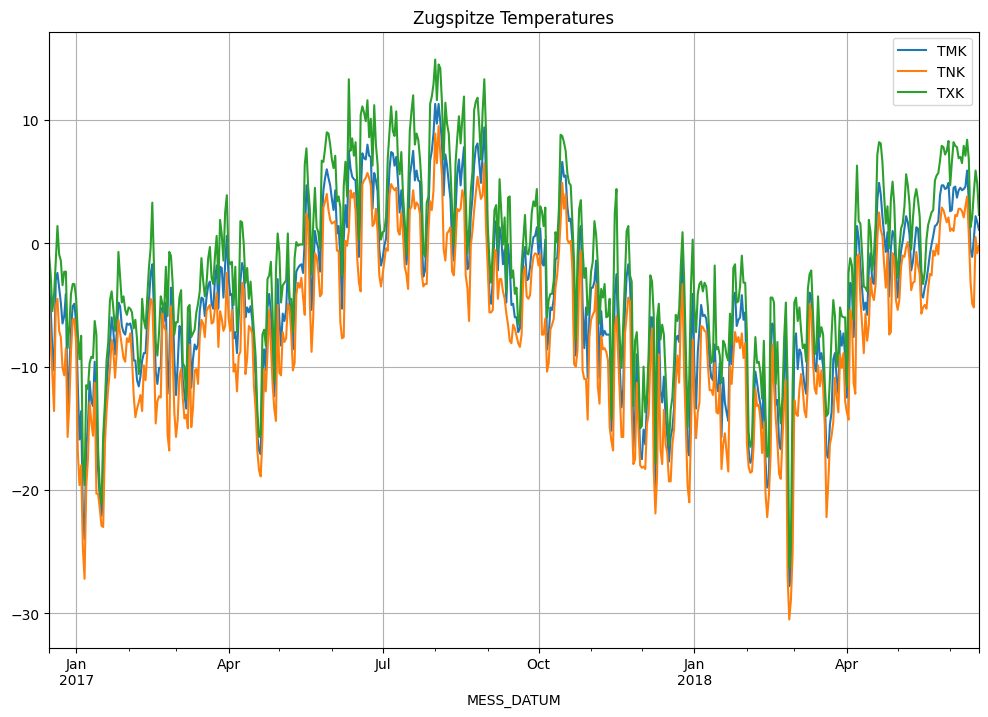

In [12]:
df[["TMK", "TNK", "TXK", "MESS_DATUM"]].plot(x="MESS_DATUM", figsize=(12, 8), grid=True, title="Zugspitze Temperatures")